# Exploratory data analysis (EDA) 
# and Modeling For Predicting Heard Desease./ 

# Evaluation¶
  + If the outcome can reach **95% accuracy** at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


/home/dkcode/miniconda3/envs/tfenv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('heart.csv', encoding='utf-8')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Below are the details and descriptions of the data features.

##### Create data dictionary

  1. age - age in years
  
  2. sex - (1 = male; 0 = female)
  
  3. cp - chest pain type
    + 0: Typical angina: chest pain related decrease blood supply to the heart
    + 1: Atypical angina: chest pain not related to heart
    + 2: Non-anginal pain: typically esophageal spasms (non heart related)
    + 3: Asymptomatic: chest pain not showing signs of disease
  
  4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is  typically cause for concern
  
  5. chol - serum cholestoral in mg/dl
    + serum = LDL + HDL + .2 * triglycerides
    + above 200 is cause for concern
  
  6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  '>126' mg/dL signals diabetes
  
  
  7. restecg - resting electrocardiographic results
    + 0: Nothing to note
    + 1: ST-T Wave abnormality
       - can range from mild symptoms to severe problems
       - signals non-normal heart beat
    +  2: Possible or definite left ventricular hypertrophy
       -  Enlarged heart's main pumping chamber
  
  8. thalach - maximum heart rate achieved
  
  9. exang - exercise induced angina (1 = yes; 0 = no)
  
  10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during  excercise unhealthy heart will stress more
  
  11. slope - the slope of the peak exercise ST segment
    + 0: Upsloping: better heart rate with excercise (uncommon)
    + 1: Flatsloping: minimal change (typical healthy heart)
    + 2: Downslopins: signs of unhealthy heart
  
  
  12. ca - number of major vessels (0-3) colored by flourosopy
    +  colored vessel means the doctor can see the blood passing through
    + the more blood movement the better (no clots)
  
  
  13. thal - thalium stress result
   + 1,3: normal
   + 6: fixed defect: used to be defect but ok now
   + 7: reversable defect: no proper blood movement when excercising
  
  14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()
# None of the data is null

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# How many class of one feature or target
# how my have heart deseas 
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

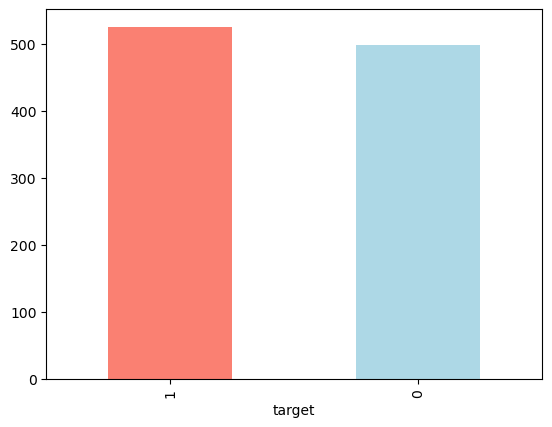

In [10]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Heart Deseas Frequency According to SEX

In [6]:
df.sex.value_counts() # check How many Male/Females are in the dataset
# 713 males
# 312 females

sex
1    713
0    312
Name: count, dtype: int64

In [ ]:
# Compare Target and Sec Column
pd.crosstab(df.target, df.sex) # check if male/female whether have deseas or not

sex,0,1
target,,
0,86,413
1,226,300


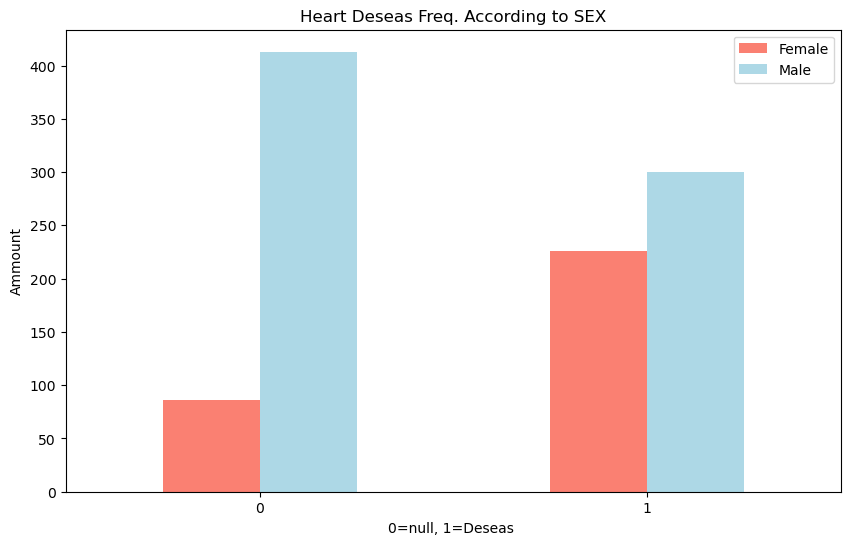

In [15]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Heart Deseas Freq. According to SEX')
plt.xlabel('0=null, 1=Deseas ')
plt.ylabel('Ammount')
plt.legend(['Female', "Male"]);
plt.xticks(rotation=0);

#### Age vs Max heart rate for Heart Deseas

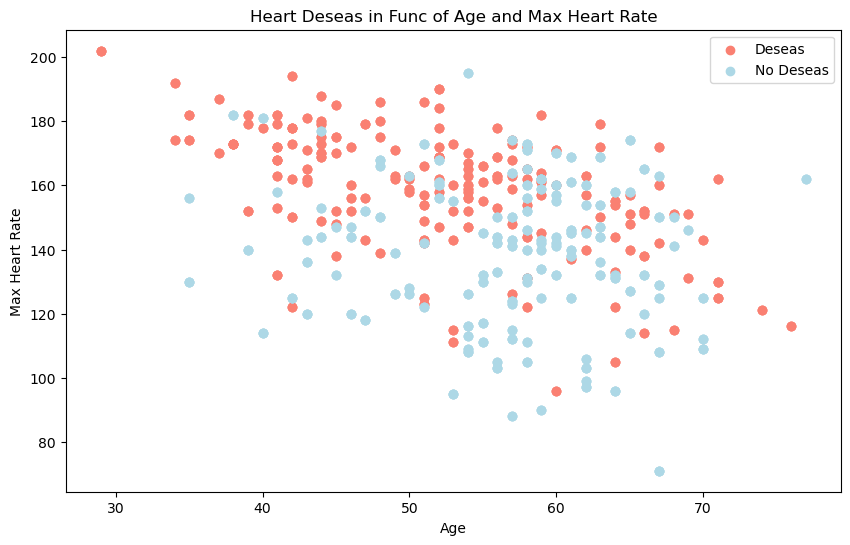

In [16]:
plt.figure(figsize=(10, 6))
# scatter with positive Ex.
plt.scatter(
    df.age[df.target==1],
    df.thalach[df.target==1],  # thalach - maximum heart rate achieved
    c='salmon'
)

#scatter with negative Ex.
plt.scatter(
    df.age[df.target==0], 
    df.thalach[df.target==0], 
    c='lightblue'
)

# add other info
plt.title('Heart Deseas in Func of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Deseas', 'No Deseas'])




##### The chances of getting maximum heart rate is higher for heart disease patients.
##### heart Rate > 120 will more likly to get positive, 
 + age between 30 and 40 and also >120 heart rate, have potential for deseas
 + Age >40 and also >120 heart rate, high Prob of getting Deseas


<Axes: ylabel='Frequency'>

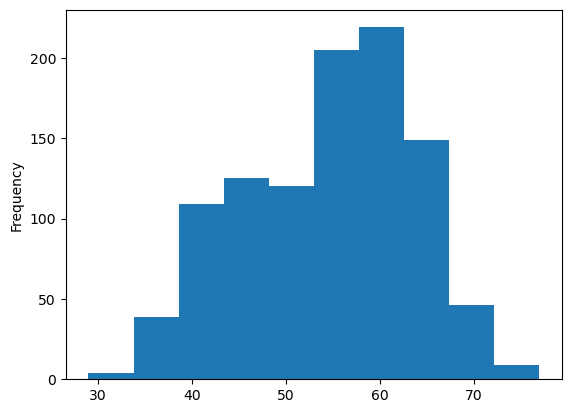

In [17]:
# Check the Distribution of the Age column with a Histogram
# May check for outliers of the data
df.age.plot.hist() 

#### In this histogram, we can see that approximately half of the samples age is between 55 to 65 years old. The rest are from 40s to 70s. There are also a few samples for 30-40 and 70 above.



## Heart Disease Frequency per Chest Pain Type
 
  + cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp, df.target)    

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

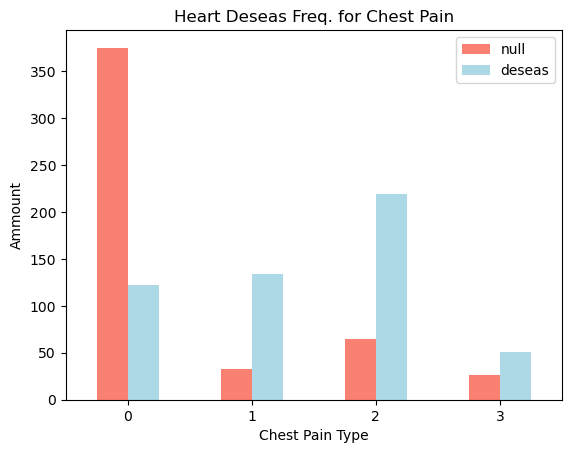

In [7]:
# Make Crosstab Vis
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart Deseas Freq. for Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Ammount')
plt.legend(['null', 'deseas'])
plt.xticks(rotation=0)

##### + Most of the heart disease patients in this dataset are associated with non-anginal pain (type 2) and asymptomatic chest pain (type 3).

##### + Chest pain types 0 (typical angina) and 1 (atypical angina) have fewer heart disease patients compared to type 2.
##### + The observation that non-heart-related pain types (like type 2) and asymptomatic cases show heart disease suggests potential misinterpretation of symptoms or underlying conditions.

# Correalation

In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

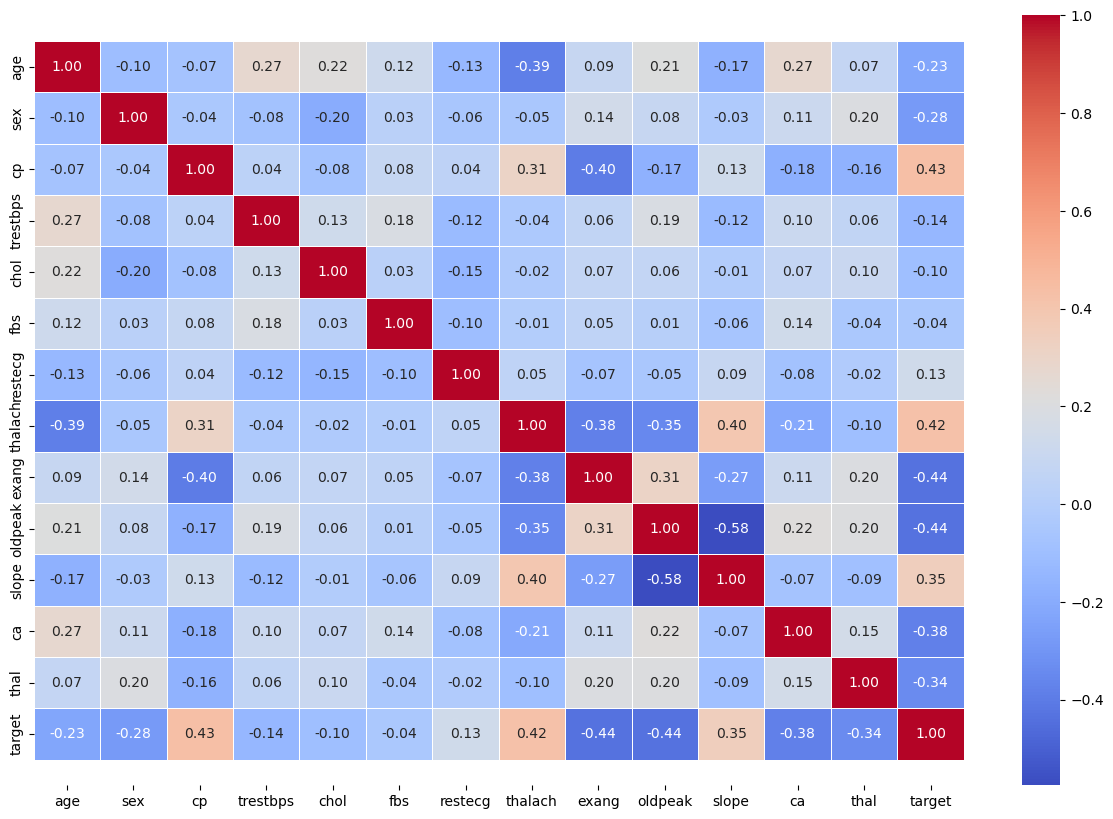

In [11]:
# visualizing Correalation Matrix
corMat = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax=sns.heatmap(corMat, annot=True, linewidths=0.5, fmt=".2f", cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

# ++++++++++++++++++++++++++++++++++++++++++++++++++

# Modeling

In [5]:
# split data
X=df.drop('target', axis=1)
y=df['target']
print(X.shape, y.shape)

(1025, 13) (1025,)


In [6]:
np.random.seed(42)
# split data train/test
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
print("xtest shape:", xTest.shape)
print("xtrain shape:", xTrain.shape)
print("ytest shape:", yTest.shape)
print("ytrain shape:", yTrain.shape)


xtest shape: (205, 13)
xtrain shape: (820, 13)
ytest shape: (205,)
ytrain shape: (820,)


# Train base Model

 + different Machine Learning models:¶
    - Logistic Regression
    - K-Nearest Neighbors Classifiers
    - Random Forest Classifiers

In [7]:
models = {
    'LR':LogisticRegression(), 
    'KNN':KNeighborsClassifier(), 
    'RF':RandomForestClassifier()
}

#create func to fit and score models
def fitAndScore(models, xtrain, xtest, ytrain, ytest):
    np.random.seed(42)
    
    modelScores = {}
    for name, model in models.items():
        model.fit(xtrain, ytrain)

        #eval
        modelScores[name]=model.score(xtest, ytest)
    
    return modelScores





In [8]:
modelScores = fitAndScore(models, xTrain, xTest, yTrain, yTest)
modelScores

/home/dkcode/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.7853658536585366, 'KNN': 0.7317073170731707, 'RF': 0.9853658536585366}

#### Model Compare

<Axes: >

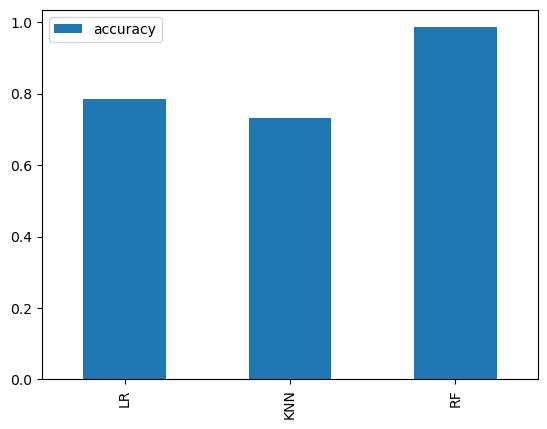

In [28]:
modelCompare = pd.DataFrame(modelScores, index=['accuracy'])
modelCompare.T.plot.bar()

### For Base model, LR and RF is work better that KNN

#### Let's look at the following:

   
   - Hypyterparameter tuning
   
   - Feature importance
   
   - Confusion matrix
   
   - Cross-validation
   
   - Precision
   
   - Recall
   
   - F1 score
   
   - Classification report
   
   - ROC curve
   
   - Area under the curve(AUC)

# Hyper para Tuning

##### Ways to tune hyperparameters¶
  
  - by hand
  
  - RandomizedSearchCV
  
  - GridSearchCV


In [9]:
# tune by hand
trainScores = []
testScores = []

#list for different values of n-neighbors
neghbours = range(1, 21)
knn = KNeighborsClassifier()

for i in neghbours:
    knn.set_params(n_neighbors=i)
    knn.fit(xTrain, yTrain)

    trainScores.append(knn.score(xTrain, yTrain))
    testScores.append(knn.score(xTest, yTest))





In [34]:
testScores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

max KNN score on the test data: 98.54


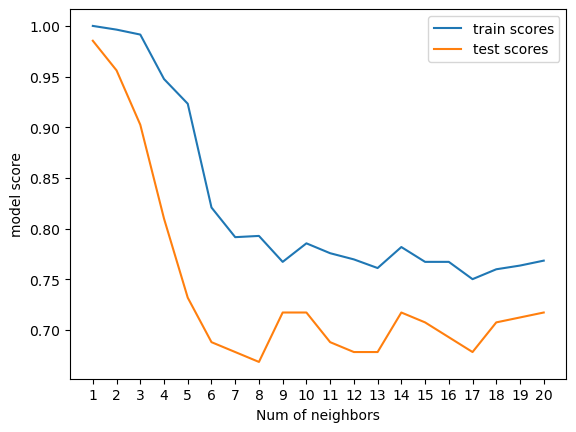

In [10]:
plt.plot(neghbours, trainScores, label='train scores')
plt.plot(neghbours, testScores, label='test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Num of neighbors')
plt.ylabel('model score')
plt.legend()

print(f"max KNN score on the test data: {max(testScores)*100:.2f}")

# Hyperparameter tuning with RandomizedSearchCV

In [11]:
# create hyper para grid for LR
logRegGrid = {
    'C':np.logspace(-4, 4, 20), 
    'solver':['liblinear']
}

#create hyper para grid for RF
rfGrid = {
    'n_estimators':np.arange(10, 1000, 50), 
    'max_depth':[None, 3, 5, 10], 
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}


In [13]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyper para search for  LR
rsLogReg = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=logRegGrid, 
    cv=5,
    n_iter=20,
    verbose=True 
)

# fit random hyper para search model for LR
rsLogReg.fit(xTrain, yTrain)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [14]:
rsLogReg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [15]:
rsLrScores = rsLogReg.score(xTest, yTest)

In [16]:
# Tune RF
#set the random para for RF
np.random.seed(42)
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=rfGrid, 
    cv=5, 
    n_iter=20, 
    verbose=True
)

rs_rf.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [17]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [18]:
#Evaluate the randomised search RF model
rs_rf_scores = rs_rf.score(xTest, yTest)

In [19]:
modelScores

{'LR': 0.7853658536585366, 'KNN': 0.7317073170731707, 'RF': 0.9853658536585366}

By using RandomizedSearchCV, the performance of random forest model has improved. But logistic regression model's performance is still higher.